##  Import libraries 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Loading data from CSV

In [12]:
# Load datasets
alberta_df = pd.read_csv('Alberta.csv')
manitoba_df = pd.read_csv('Manitoba.csv')
ontario_df = pd.read_csv('Ontario.csv')
quebec_df = pd.read_csv('Quebec.csv')
vancouver_df = pd.read_csv('Vancouver.csv')

# Clean datasets by removing rows where 'rating' is 0
alberta_cleaned = alberta_df[alberta_df['rating'] != 0]
manitoba_cleaned = manitoba_df[manitoba_df['rating'] != 0]
ontario_cleaned = ontario_df[ontario_df['rating'] != 0]
quebec_cleaned = quebec_df[quebec_df['rating'] != 0]
vancouver_cleaned = vancouver_df[vancouver_df['rating'] != 0]

# Save cleaned datasets
alberta_cleaned.to_csv('Alberta_cleaned.csv', index=False)
manitoba_cleaned.to_csv('Manitoba_cleaned.csv', index=False)
ontario_cleaned.to_csv('Ontario_cleaned.csv', index=False)
quebec_cleaned.to_csv('Quebec_cleaned.csv', index=False)
vancouver_cleaned.to_csv('Vancouver_cleaned.csv', index=False)

# Load cleaned datasets for analysis
alberta_cleaned = pd.read_csv('Alberta_cleaned.csv')
manitoba_cleaned = pd.read_csv('Manitoba_cleaned.csv')
ontario_cleaned = pd.read_csv('Ontario_cleaned.csv')
quebec_cleaned = pd.read_csv('Quebec_cleaned.csv')
vancouver_cleaned = pd.read_csv('Vancouver_cleaned.csv')

# Combine the cleaned datasets into a single DataFrame for analysis
df_combined = pd.concat([alberta_cleaned, manitoba_cleaned, ontario_cleaned, quebec_cleaned, vancouver_cleaned], ignore_index=True)

# Display a sample of the combined DataFrame
print(df_combined.head())



                                                 url  \
0  https://www.opentable.com/the-parlour-italian-...   
1  https://www.opentable.com/r/lux-steakhouse-and...   
2  https://www.opentable.com/r/stingray-bar-eater...   
3  https://www.opentable.com/r/bell-in-scona-edmo...   
4  https://www.opentable.com/la-ronde-chateau-lac...   

                           rest_name  number_of_reviews  rating  \
0  The Parlour Italian Kitchen & Bar               1401     4.6   
1             LUX Steakhouse + BAR94               1220     4.1   
2              STINGRAY BAR | EATERY                 89     4.7   
3                      Bell in Scona                 45     4.3   
4         La Ronde - Chateau Lacombe               2286     4.6   

           food_type            coupon  food  service  ambience  value  \
0            Italian  CAN$30 and under   4.5      4.7       4.6    4.5   
1         Steakhouse   CAN$51 and over   4.1      4.3       4.1    3.7   
2  Creative Japanese  CAN$30 and under

## Visualizing rating distribution with histogram


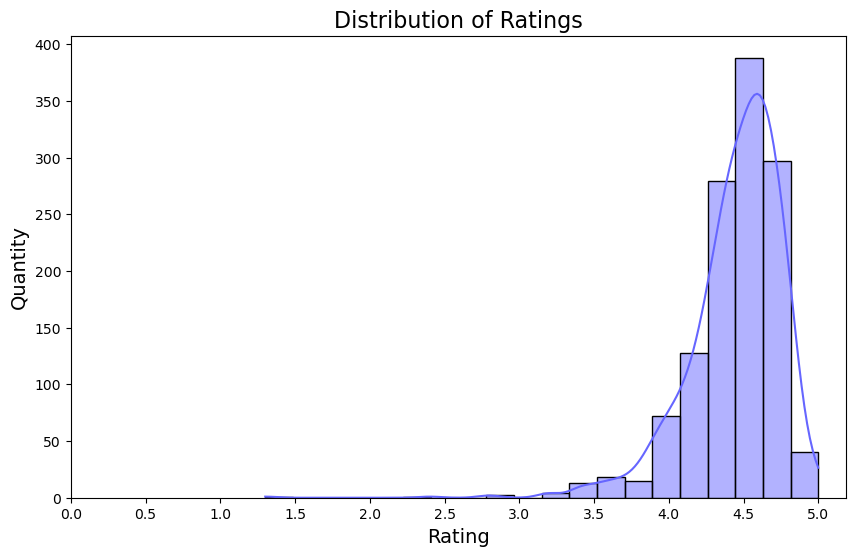

In [48]:
# Plot the distribution of the 'rating' column using the correct DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['rating'], kde=True, bins=20, color='#6666FF')

# Customize the plot
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Quantity', fontsize=14)

# Set x-ticks to show intervals of 0.5 from 0 to 5
xticks = np.arange(0, 5.5, 0.5)
plt.xticks(xticks)
plt.grid(False)  # Disable grid lines

# Display the plot
plt.show()


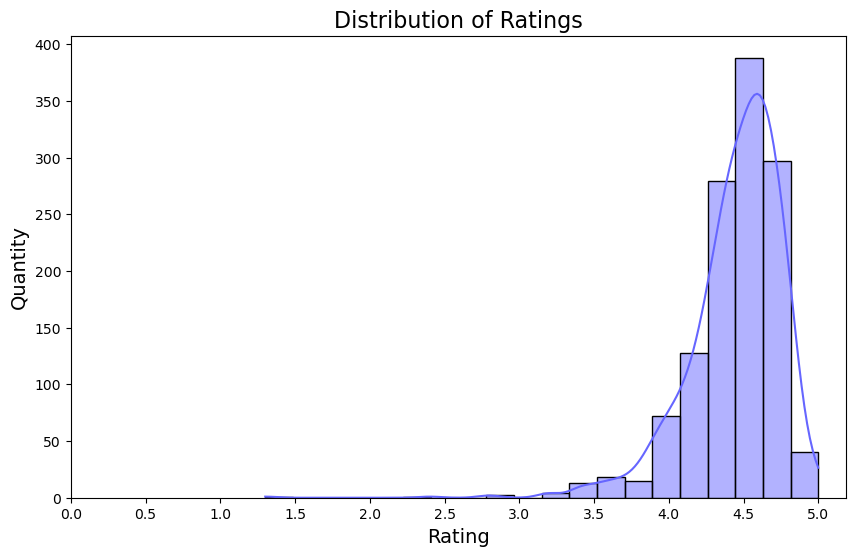

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'rating' column
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['rating'], kde=True, bins=20, color='#6666FF')

# Customize the plot
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Quantity', fontsize=14)

# Set x-ticks to show intervals of 0.5
xticks = np.arange(0, 5.5, 0.5)
plt.xticks(xticks)
plt.grid(False)  # Disable the grid lines

# Display the plot
plt.show()


## Visualizing distributions of various ratings (food, service, ambience, value)

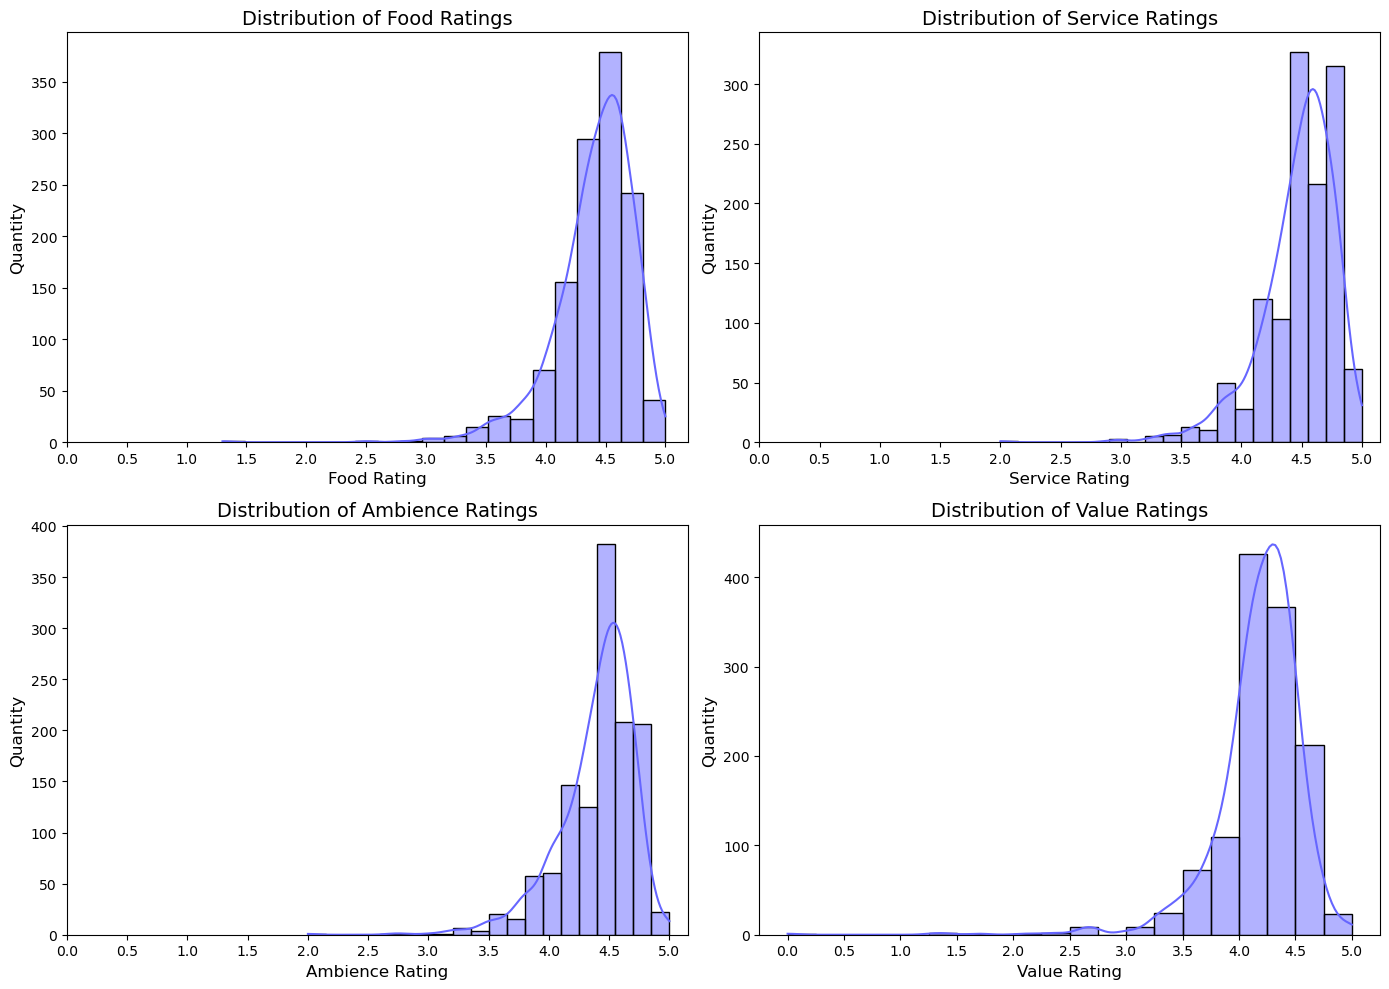

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the columns for analysis
columns = ['food', 'service', 'ambience', 'value']

# Titles and x-labels for the subplots
titles = ['Distribution of Food Ratings', 'Distribution of Service Ratings', 
          'Distribution of Ambience Ratings', 'Distribution of Value Ratings']
x_labels = ['Food Rating', 'Service Rating', 'Ambience Rating', 'Value Rating']

# Set up the figure for subplots
plt.figure(figsize=(14, 10))

# Iterate over the columns to create histograms
for i, column in enumerate(columns):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid of subplots
    sns.histplot(df_combined[column], kde=True, bins=20, color='#6666FF')
    
    # Customize the plot
    plt.title(titles[i], fontsize=14)
    plt.xlabel(x_labels[i], fontsize=12)
    plt.ylabel('Quantity', fontsize=12)

    # Set x-ticks with intervals of 0.5 from 0 to 5
    xticks = np.arange(0, 5.5, 0.5)
    plt.xticks(xticks)
    plt.grid(False)

# Adjust layout to prevent overlap and make it more readable
plt.tight_layout()
plt.show()


## Generating a WordCloud from customer comments


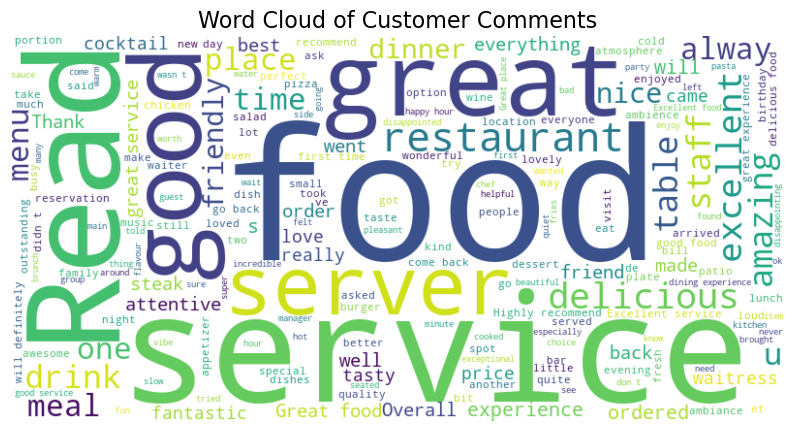

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the comments into a single text string, using the correct DataFrame name
text = ' '.join(df_combined['comments'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Comments', fontsize=16)
plt.show()


## Analyzing Top 10 food types in restaurants

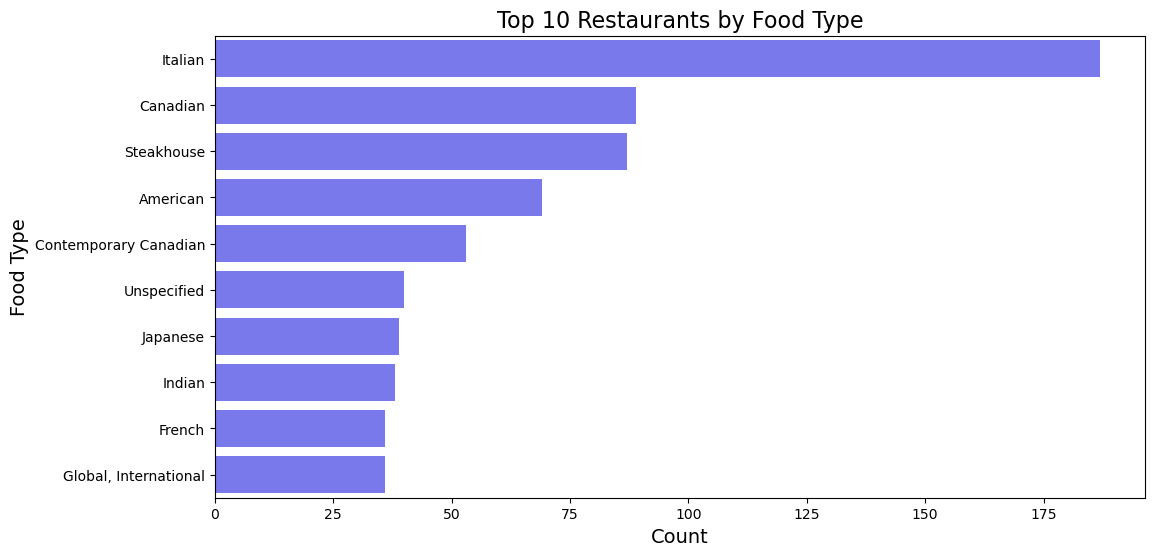

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the correct DataFrame name and find the top 10 food types
top_food_types = df_combined['food_type'].value_counts().nlargest(10).index

# Plot the count of the top 10 food types
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_combined[df_combined['food_type'].isin(top_food_types)], 
    y='food_type', 
    order=top_food_types, 
    color='#6666FF'
)

# Customize the plot
plt.title('Top 10 Restaurants by Food Type', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Food Type', fontsize=14)
plt.xticks(rotation=0)
plt.grid(False)  # Remove the grid

# Display the plot
plt.show()



## Scatter Plot of food vs. service ratings

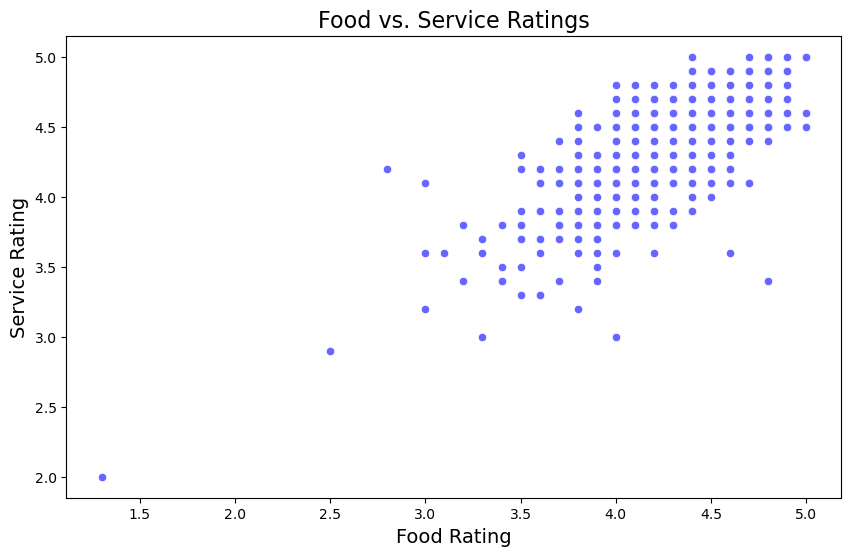

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot for 'food' vs. 'service' ratings using the correct DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='food', y='service', data=df_combined, color='#6666FF')

# Customize the plot
plt.title('Food vs. Service Ratings', fontsize=16)
plt.xlabel('Food Rating', fontsize=14)
plt.ylabel('Service Rating', fontsize=14)
plt.grid(False)  # Remove grid lines

# Display the plot
plt.show()


## Top 10 Restaurants by rating

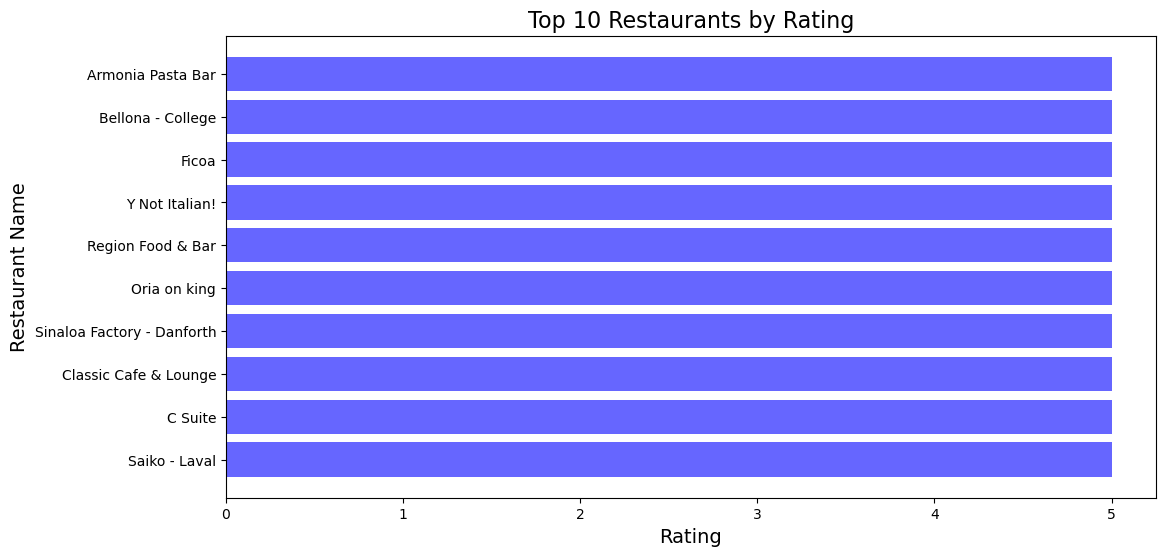

In [23]:
import matplotlib.pyplot as plt

# Select the top 10 restaurants by rating from the correct DataFrame
top_ratings = df_combined.nlargest(10, 'rating')

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_ratings['rest_name'], top_ratings['rating'], color='#6666FF')

# Customize the plot
plt.title('Top 10 Restaurants by Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Restaurant Name', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rating on top
plt.grid(False)  # Remove grid lines

# Display the plot
plt.show()
 

## Top 10 Restaurants by number of reviews

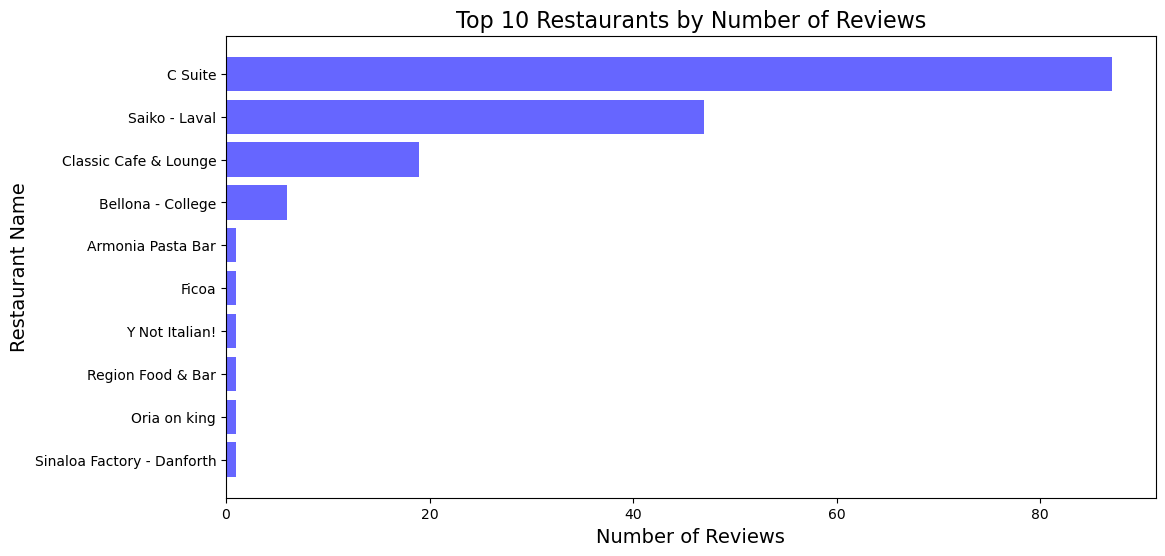

In [24]:
import matplotlib.pyplot as plt

# Get the top 10 restaurants based on the highest ratings from the correct DataFrame
top_expensive = df_combined.nlargest(10, 'rating')

# Handle missing restaurant names by replacing them with 'Unknown Restaurant'
top_expensive['rest_name'].fillna('Unknown Restaurant', inplace=True)

# Ensure that restaurant names are treated as strings
top_expensive['rest_name'] = top_expensive['rest_name'].astype(str)

# Sort the top restaurants by the number of reviews in descending order
top_expensive = top_expensive.sort_values(by='number_of_reviews', ascending=False)

# Create a horizontal bar chart for the number of reviews
plt.figure(figsize=(12, 6))
plt.barh(top_expensive['rest_name'], top_expensive['number_of_reviews'], color='#6666FF')

# Customize the plot
plt.title('Top 10 Restaurants by Number of Reviews', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Restaurant Name', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(False)  # Remove grid lines

# Display the plot
plt.show()


## Distribution of coupon types

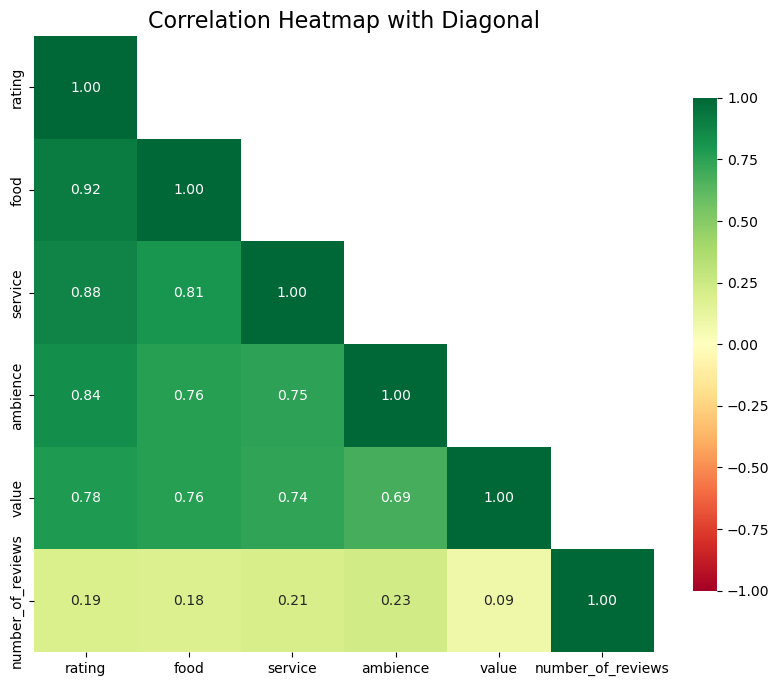

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix using the correct DataFrame
corr = df_combined[['rating', 'food', 'service', 'ambience', 'value', 'number_of_reviews']].corr()

# Generate a mask for the upper triangle, excluding the diagonal
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)  # `k=1` excludes the diagonal

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask, correct aspect ratio, and no grid lines
sns.heatmap(
    corr, 
    mask=mask, 
    annot=True, 
    fmt='.2f', 
    cmap='RdYlGn', 
    vmin=-1, 
    vmax=1, 
    center=0, 
    linewidths=0,  # Set linewidths to 0 to remove grid lines
    cbar_kws={'shrink': 0.8}
)

# Add title
plt.title('Correlation Heatmap with Diagonal', fontsize=16)

# Display the plot
plt.show()


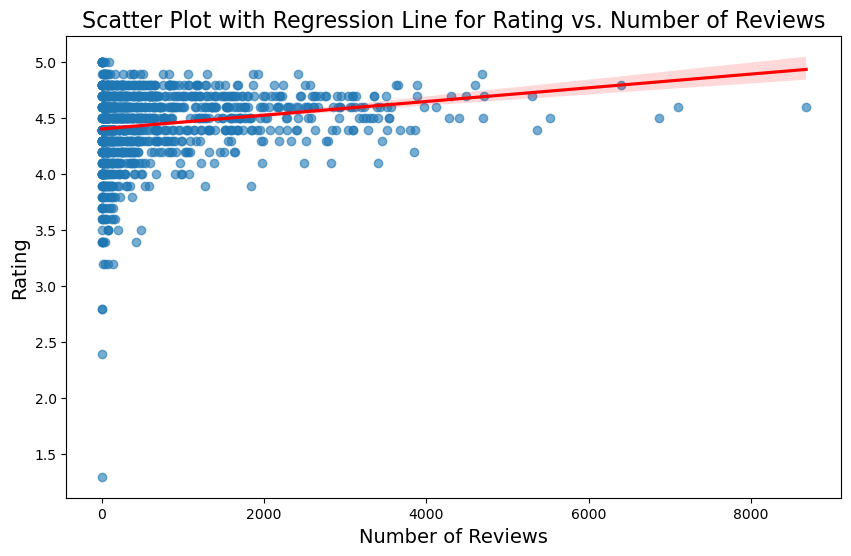

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where 'number_of_reviews' is 0 using the correct DataFrame
df_filtered = df_combined[df_combined['number_of_reviews'] > 0]

# Create the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='number_of_reviews', y='rating', data=df_filtered, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})

# Customize the plot
plt.title('Scatter Plot with Regression Line for Rating vs. Number of Reviews', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.grid(False)

# Display the plot
plt.show()



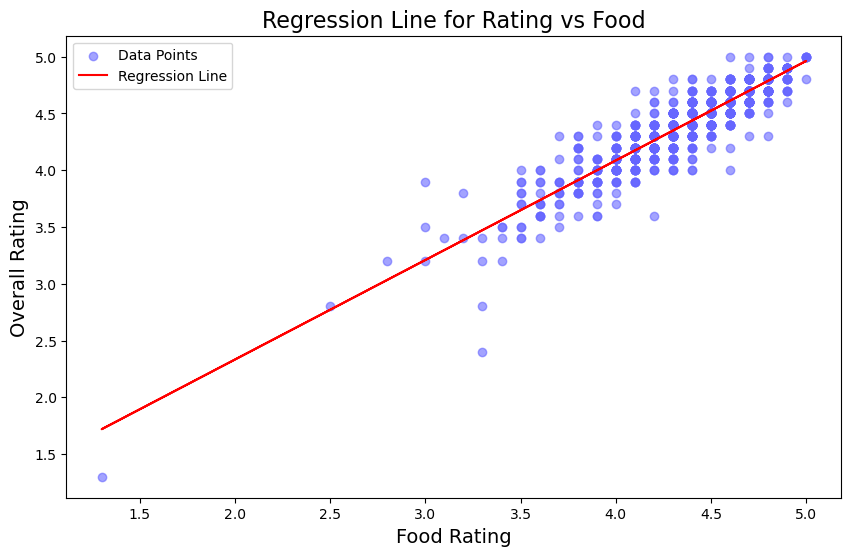

In [30]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Prepare the data using the correct DataFrame
X = df_combined[['food']]  # Independent variable
y = df_combined['rating']  # Dependent variable

# Create and fit the regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='#6666FF', alpha=0.6, label='Data Points')  # Scatter plot of actual data
plt.plot(X, y_pred, color='red', label='Regression Line')  # Regression line
plt.title('Regression Line for Rating vs Food', fontsize=16)
plt.xlabel('Food Rating', fontsize=14)
plt.ylabel('Overall Rating', fontsize=14)
plt.legend()
plt.grid(False)  # Disable the grid for a cleaner look

# Display the plot
plt.show()


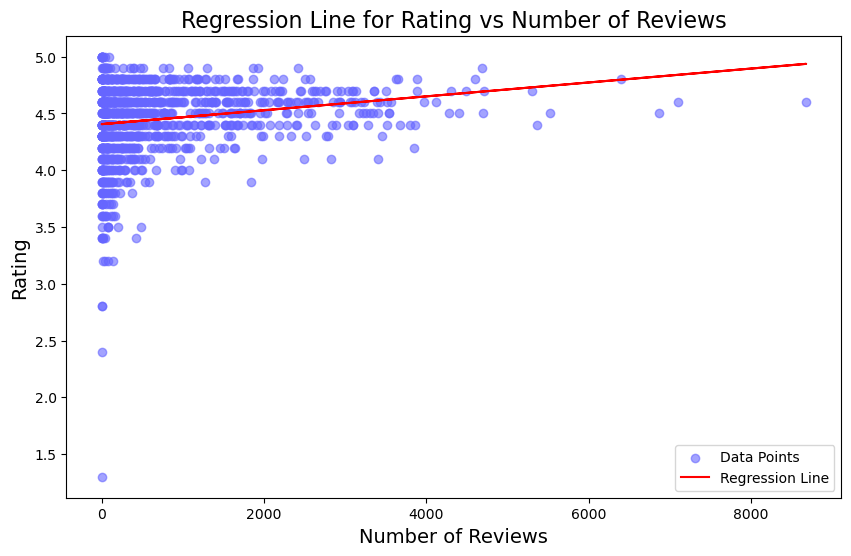

In [32]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Prepare the data using the correct DataFrame
X6 = df_combined[['number_of_reviews']]  # Independent variable
y = df_combined['rating']  # Dependent variable

# Create and fit the regression model
model6 = LinearRegression()
model6.fit(X6, y)

# Make predictions
y_pred6 = model6.predict(X6)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X6, y, color='#6666FF', alpha=0.6, label='Data Points')  # Scatter plot of actual data
plt.plot(X6, y_pred6, color='red', label='Regression Line')  # Regression line
plt.title('Regression Line for Rating vs Number of Reviews', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.legend()
plt.grid(False)  # Disable the grid for a cleaner look

# Display the plot
plt.show()


## Top 10 Restaurants by number of reviews 

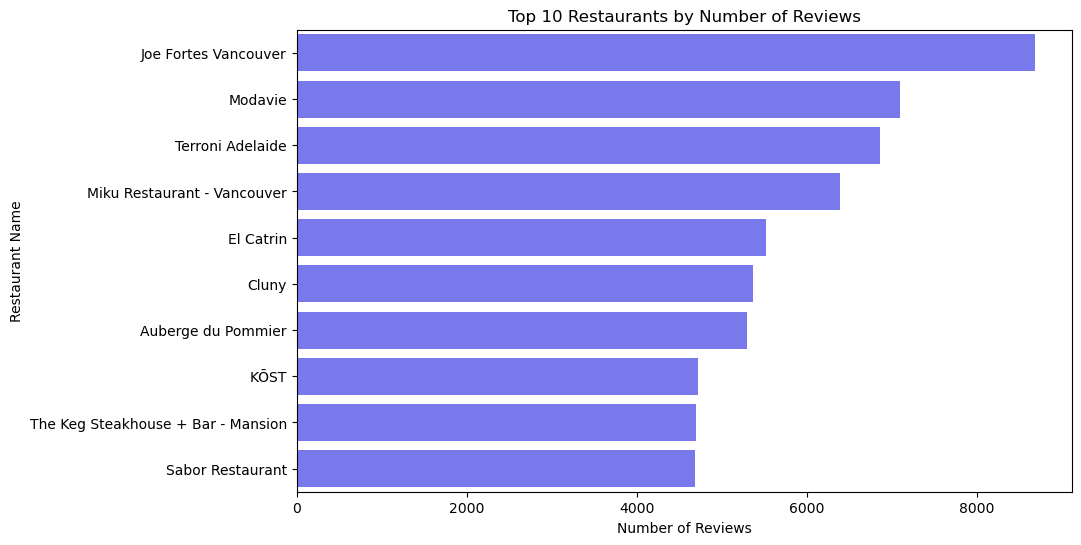

In [33]:
# Concatenate the DataFrames
all_data = pd.concat([alberta_df, manitoba_df, ontario_df, quebec_df, vancouver_df])

# Convert 'number_of_reviews' to numeric, forcing errors to NaN
all_data['number_of_reviews'] = pd.to_numeric(all_data['number_of_reviews'], errors='coerce')

# Drop rows with NaN in 'number_of_reviews'
all_data.dropna(subset=['number_of_reviews'], inplace=True)

# Get the top 10 restaurants by number of reviews
top_10_restaurants = all_data.nlargest(10, 'number_of_reviews')

# Create a bar plot for the top 10 restaurants with specific color
plt.figure(figsize=(10,6))
sns.barplot(x='number_of_reviews', y='rest_name', data=top_10_restaurants, color='#6666FF')
plt.title('Top 10 Restaurants by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Restaurant Name')
plt.show()


## Top 10 Restaurants by number of reviews (Categorized by City)

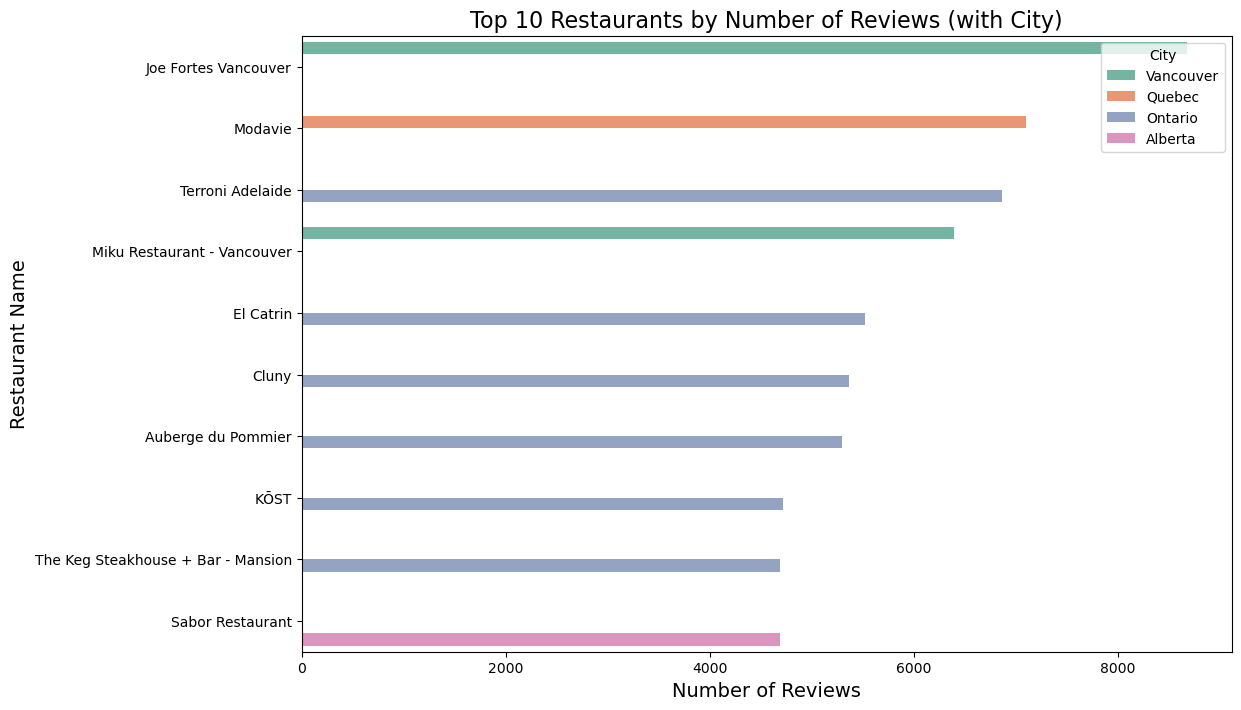

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add a 'city' column to each cleaned DataFrame
alberta_cleaned['city'] = 'Alberta'
manitoba_cleaned['city'] = 'Manitoba'
ontario_cleaned['city'] = 'Ontario'
quebec_cleaned['city'] = 'Quebec'
vancouver_cleaned['city'] = 'Vancouver'

# Concatenate the cleaned DataFrames
all_data = pd.concat([alberta_cleaned, manitoba_cleaned, ontario_cleaned, quebec_cleaned, vancouver_cleaned], ignore_index=True)

# Convert 'number_of_reviews' to numeric, forcing errors to NaN
all_data['number_of_reviews'] = pd.to_numeric(all_data['number_of_reviews'], errors='coerce')

# Drop rows with NaN in 'number_of_reviews'
all_data.dropna(subset=['number_of_reviews'], inplace=True)

# Get the top 10 restaurants by number of reviews
top_10_restaurants = all_data.nlargest(10, 'number_of_reviews')

# Create a bar plot for the top 10 restaurants, colored by city
plt.figure(figsize=(12, 8))
sns.barplot(x='number_of_reviews', y='rest_name', hue='city', data=top_10_restaurants, palette='Set2')

# Customize the plot
plt.title('Top 10 Restaurants by Number of Reviews (with City)', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Restaurant Name', fontsize=14)
plt.legend(title='City', loc='upper right')
plt.grid(False)

# Display the plot
plt.show()


##  Number of unique food types by city

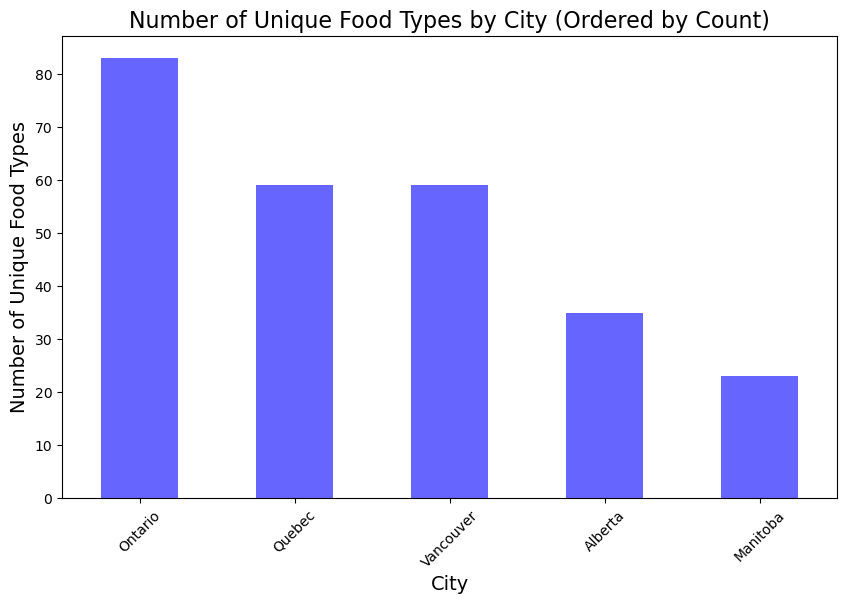

In [45]:
# Add a 'city' column to each cleaned DataFrame
alberta_cleaned['city'] = 'Alberta'
manitoba_cleaned['city'] = 'Manitoba'
ontario_cleaned['city'] = 'Ontario'
quebec_cleaned['city'] = 'Quebec'
vancouver_cleaned['city'] = 'Vancouver'

# Concatenate the cleaned DataFrames
combined_data = pd.concat([alberta_cleaned, manitoba_cleaned, ontario_cleaned, quebec_cleaned, vancouver_cleaned], ignore_index=True)

# Count the unique food types for each city and sort in descending order
food_types_per_city = combined_data.groupby('city')['food_type'].nunique()
food_types_per_city_sorted = food_types_per_city.sort_values(ascending=False)

# Plot the sorted bar plot
plt.figure(figsize=(10, 6))
food_types_per_city_sorted.plot(kind='bar', color='#6666FF')

# Customize the plot
plt.title('Number of Unique Food Types by City (Ordered by Count)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Unique Food Types', fontsize=14)
plt.xticks(rotation=45)

# Display the plot
plt.show()


## Most common food types across cities

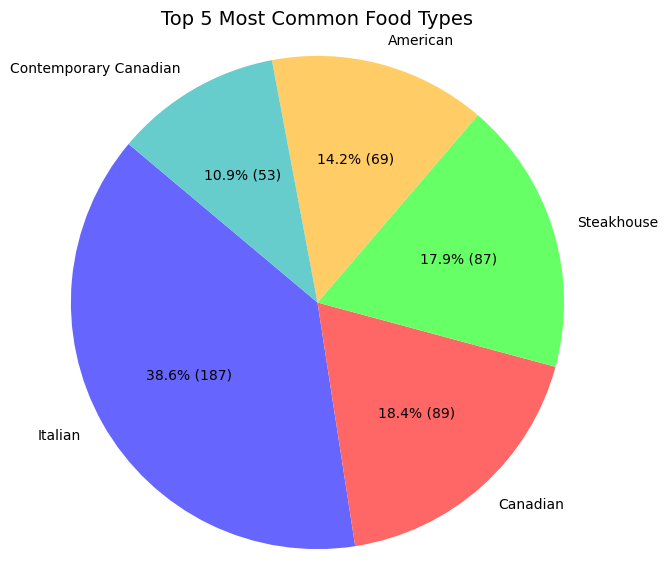

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine the cleaned datasets
combined_data = pd.concat([alberta_cleaned, manitoba_cleaned, ontario_cleaned, quebec_cleaned, vancouver_cleaned], ignore_index=True)

# Prepare data for the pie chart: Get the top 5 most common food types
common_food_count = combined_data.groupby('food_type').size().sort_values(ascending=False).head(5)

# Define a function for autopct to show both percentage and count
def func(pct, allvals):
    absolute = int(round(pct / 100.0 * sum(allvals)))
    return f"{pct:.1f}% ({absolute})"

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    common_food_count,
    labels=common_food_count.index,
    autopct=lambda pct: func(pct, common_food_count),
    startangle=140,
    colors=['#6666FF', '#FF6666', '#66FF66', '#FFCC66', '#66CCCC']
)

# Customize the plot
plt.title('Top 5 Most Common Food Types', fontsize=14)
plt.axis('equal')  # Ensure the pie chart is circular

# Display the plot
plt.show()
